In [160]:
import numpy as np
import pandas as pd

import os, ast
    
import library as lib
import faiss_experiment as faiss_tool

import matplotlib.pyplot as plt
lib.concat_csvs([
            'experiments' + os.sep + 'executed_faiss_experiments_index_hnsw_efsearch_50_all.csv', \
            # 'experiments' + os.sep + 'executed_faiss_experiments_index_hnsw_all_all.csv', \
            # 'experiments' + os.sep + 'executed_faiss_experiments_index_hnsw_efsearch_50_round2.csv',\
            # 'experiments' + os.sep + 'executed_faiss_experiments_index_hnsw_efsearch_50_round3.csv',\
            'experiments' + os.sep + 'executed_faiss_experiments_index_hnsw_all_all.csv'], 'experiments' + os.sep + 'executed_faiss_experiments_index_hnsw_all_all+50.csv')


,segment_lenght,segment_overlap,feature,vector_operation,metric_type,vote_type,neighbors,index_params,skipped,accuracy,...,precision_1,precision_2,precision_3,training_set_size,testing_set_size,train_time,predict_time,train_used_memory,predict_used_memory,row_key
0,10,all,pe-mfcc_40,mean,cosine,uniform,20,"{'params':'HNSW50,PQ10', 'efConstruction': 300...",False,0.926881,...,0.838537,0.922353,0.956933,159306,40236,53.223419,0.466659,64.774474,445.781250,ef92b43df66ecde1523e469d75121358
1,10,all,pe-mfcc_40,mean,cosine,uniform,20,"{'params':'HNSW50,PQ10', 'efConstruction': 500...",False,0.927528,...,0.839771,0.922889,0.957324,159306,40236,67.175432,0.383598,64.774474,477.609375,b742d47309dfd574fbdc411a9c205f55
2,10,all,pe-mfcc_40,mean,cosine,uniform,20,"{'params':'HNSW100,PQ10', 'efConstruction': 50...",False,0.927652,...,0.842926,0.922270,0.956845,159306,40236,68.474237,0.371749,125.519893,495.234375,cb200adde3dfcb051c727d3e723a63e2
3,10,all,pe-mfcc_40,mean,cosine,uniform,20,"{'params':'HNSW100,PQ10', 'efConstruction': 70...",False,0.927602,...,0.841296,0.923049,0.956982,159306,40236,82.701413,0.409489,125.519893,523.484375,e0c26e9b879f0a2598cf62a819960f4f
4,10,all,pe-mfcc_40,mean,correlation,uniform,15,"{'params':'HNSW50,Flat', 'efConstruction': 300...",False,0.934213,...,0.849639,0.928013,0.964084,159306,40236,25.014550,0.337283,87.524279,516.921875,fd63ddc9e3ab7057c46dadcc1f4522d5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'HNSW100,SQ8', 'efConstruction': 700...",False,0.934561,...,0.844939,0.929195,0.965238,159306,40236,67.105239,1.792155,130.038912,565.203125,6bdc8d9c86e650c352cd291fd9078fa9
1916,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'HNSW50,PQ10', 'efConstruction': 300...",False,0.930585,...,0.842566,0.919316,0.963688,159306,40236,53.145912,0.627393,64.774474,497.937500,e5b1ddeed596faffb27c7b9cd870f36e
1917,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'HNSW50,PQ10', 'efConstruction': 300...",False,0.931032,...,0.844189,0.919365,0.963646,159306,40236,53.145912,0.668259,64.774474,505.281250,7bbca5ec55cbbc658ef0e7a70917e9bb
1918,10,all,pe-mfcc_40,mean_iqr25,correlation,uniform,20,"{'params':'HNSW50,PQ10', 'efConstruction': 300...",False,0.931181,...,0.844919,0.919345,0.963457,159306,40236,53.145912,1.506785,64.774474,497.609375,44a4ebd199106df3536f804dfaeaf8f4


Error generating milvus fields: 'str' object has no attribute 'get'
   indexFactory_full2 accuracy_min accuracy_mean accuracy_max train_used_memory_min train_time_min predict_time_min
0    HNSW100,Flat-500       93.40%        93.50%       93.64%                148.27        42.5440           0.1763
1    HNSW100,Flat-700       93.40%        93.50%       93.64%                148.27        56.3896           0.1796
2     HNSW50,Flat-300       93.39%        93.49%       93.64%                 87.52        25.0146           0.1699
3     HNSW50,Flat-500       93.40%        93.49%       93.64%                 87.52        41.6036           0.1761
4     HNSW100,SQ8-700       93.17%        93.39%       93.62%                130.04        63.7175           0.2091
5     HNSW100,SQ8-500       93.18%        93.40%       93.61%                130.04        46.9948           0.2075
6      HNSW50,SQ8-300       93.10%        93.38%       93.59%                 69.29        27.7411           0.2051
7   

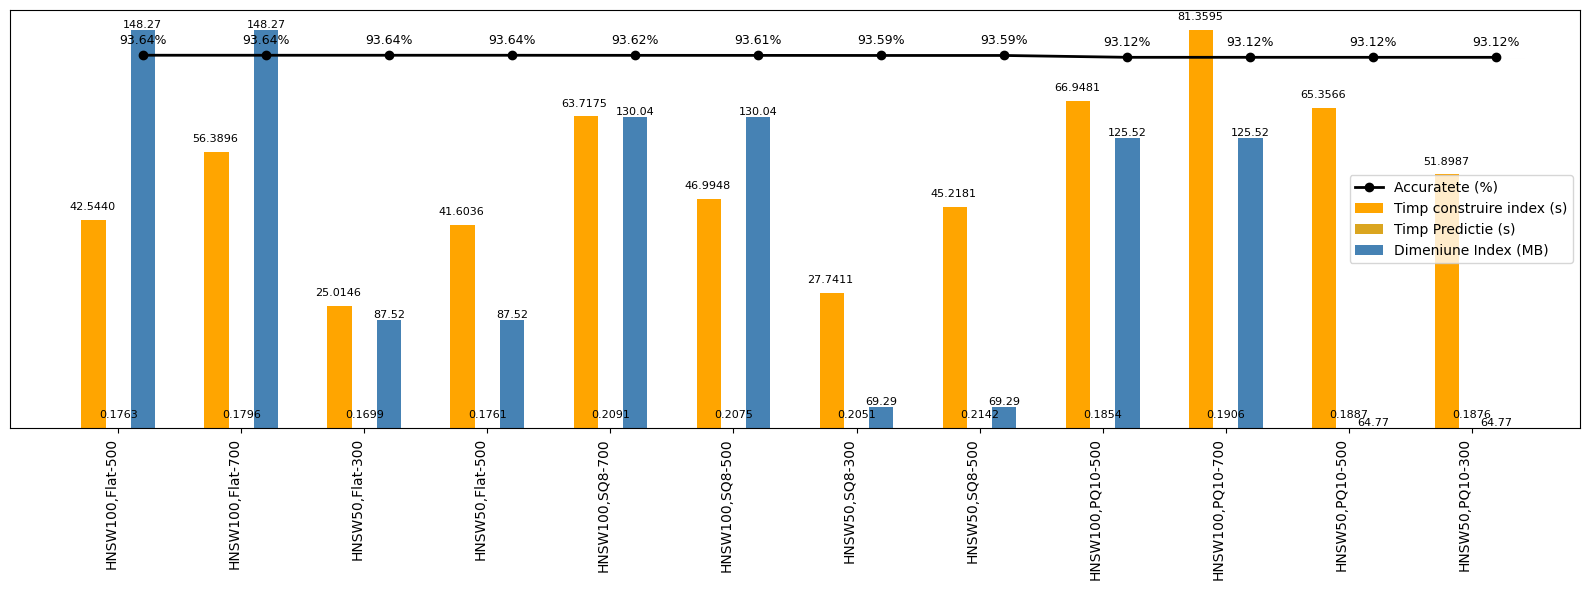

In [181]:
def scale_values(df):
    # Grupuri logice
    time_cols = ['train_time_min', 'predict_time_min']
    memory_cols = ['train_used_memory_min']

    # 1. Concatenăm valorile din cele 2 coloane de timp și normalizăm împreună
    all_time_values = pd.concat([df[col] for col in time_cols])
    min_time = all_time_values.min()
    max_time = all_time_values.max()

    # Normalizare pe ambele coloane de timp
    for col in time_cols:
        df[f"{col}_scaled"] = (df[col] - min_time) / (max_time - min_time)

    # 2. La fel pentru memorie
    all_memory_values = pd.concat([df[col] for col in memory_cols])
    min_mem = all_memory_values.min()
    max_mem = all_memory_values.max()

    for col in memory_cols:
        df[f"{col}_scaled"] = (df[col] - min_mem) / (max_mem - min_mem)
    
    return df
    
def format_time_on_plot(time_value):
    return f"{time_value:.4f}"

def format_size_on_plot(size_value):
    return (f"{size_value:.2f}")

def represent_index_performances_v3(df, group_field, image_name, use_index_memory = True, use_train_time = True, angle_label=90):
    accuracy_field = "accuracy_max"
    x = range(len(df))
    x_labels = df[group_field] #.apply(lambda item: ast.literal_eval(item)["params"])
    bar_width = 0.2

    df = scale_values(df)
    fig, ax = plt.subplots(figsize=(16, 6))

    if (use_train_time):
        ax.bar([p - bar_width for p in x], df['train_time_min_scaled'], width=bar_width, label='Timp construire index (s)', color='orange')
    ax.bar(x, df['predict_time_min_scaled'], width=bar_width, label='Timp Predictie (s)', color='goldenrod')


    # Bare pentru memorie (2)
    if (use_index_memory):
        ax.bar([p + bar_width for p in x], df['train_used_memory_min_scaled'], width=bar_width, label='Dimeniune Index (MB)', color='steelblue')

    # Linie pentru accuracy
    ax.plot([p + bar_width for p in x], df[accuracy_field], color='black', marker='o', linewidth=2, label='Accuratete (%)')

    # Afișare valori reale pe linia de accuracy
    for i, row in df.iterrows():
        text_pos_y = row[accuracy_field] + 0.02
        ax.text(i + bar_width, text_pos_y, f"{100 * row[accuracy_field]:.2f}%", ha='center', va='bottom', fontsize=9, color='black')
        
    for i, row in df.iterrows():
        if (use_train_time):
            ax.text(i - bar_width - 0.01, row['train_time_min_scaled'] + 0.02, format_time_on_plot(row['train_time_min']), ha='center', va='bottom', fontsize=8)        
        ax.text(i, row['predict_time_min_scaled'] + 0.02, format_time_on_plot(row['predict_time_min']), ha='center', va='bottom', fontsize=8)
        if (use_index_memory):
            ax.text(i + bar_width, row['train_used_memory_min_scaled'], format_size_on_plot(row['train_used_memory_min']), ha='center', va='bottom', fontsize=8)
        
    ax.set_yticks([]) 
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=angle_label, ha='right')
    plt.grid(False)
    #plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.2, color='gray')
    #plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.2, color='gray')
    ax.legend()
    plt.tight_layout()
    plt.savefig(image_name, format="svg")
    plt.show()

def extract_all_faiss_results(results_file_path, group_field = 'indexFactory', sort_by = 'accuracy_max', sort_ascending=False):
    df = pd.read_csv(results_file_path)
    
    #df = df[df['index_params'].str.contains('PQ')]
    agg_columns = ['accuracy', 'train_time', 'predict_time', 'train_used_memory', 'predict_used_memory']

    try:
        df['indexTypeMilvus'] = df['index_params'].apply(lambda item: ast.literal_eval(item).get("index_type"))
        df['nListmilvus'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("params").get("nlist")))
        df['pq_m_milvus'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("params").get("m", "")))
        df['nprobeMilvus'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("nprobe")))
        df['indexFactoryMilvus'] = 'IVF' + df['nListmilvus'] + df['indexTypeMilvus'].str.replace('IVF_FLAT', ',Flat')
        df['indexFactoryMilvus'] = df['indexFactoryMilvus'].str.replace('IVF_SQ8', ',SQ8') 
        
        df['indexFactoryMilvus'] = np.where(df['indexTypeMilvus']=='IVF_PQ', 'IVF' + df['nListmilvus'] + ",PQ" + df['pq_m_milvus'].astype(str), df['indexFactoryMilvus'])
        # df['indexFactoryMilvus'] = 'IVF' + df['nListmilvus'].astype(str)
        # df['indexFactoryMilvus'] += np.where(
        #     df['indexTypeMilvus'] == 'IVF_FLAT', ',Flat',
        #     np.where(
        #         df['indexTypeMilvus'] == 'IVF_SQ', ',SQ8',
        #         ',PQ' + df['pq_m_milvus'].astype(str)
        #     )
        # )
        df['indexFactoryMilvus2'] = df['indexTypeMilvus'] + "-" + df['nListmilvus'] + "-" + df['nprobeMilvus'] 
        df = df[df['pq_m_milvus'] != '8'] #exclude PQ8 
    except Exception as e:
        print("Error generating milvus fields:", e)
        pass
    df['indexFactory'] = df['index_params'].apply(lambda item: ast.literal_eval(item).get("params"))
    df['nprobe'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("nprobe")))
    df['efConstruction'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("efConstruction")))
    df['efSearch'] = df['index_params'].apply(lambda item: str(ast.literal_eval(item).get("efSearch")))
    try:
        df['indexFactory_full1'] = df['indexFactory'] + "-" + df['nprobe']
        df['indexFactory_full2'] = df['indexFactory'] + "-" + df['efConstruction']
        df['indexFactory_full3'] = df['indexFactory'] + "-" + df['efConstruction'] + "-" + df['efSearch']
    except:
        print("Error generating other index fields:", e)
        pass
        
    #df = df[df['index_params'].str.contains(',PQ')]
    #print(df.head(100).to_string())
    result = df.groupby(group_field)[agg_columns].agg(['min', 'mean', 'max'])
    result.columns = ['_'.join(col).strip() for col in result.columns.values]
    result = result.reset_index()

    # Sortare după acuratețea maximă descrescător
    result = result.sort_values(by=sort_by, ascending=sort_ascending)
    result = result.reset_index(drop=True)
    df_reduced = result[[group_field, 'accuracy_min', 'accuracy_mean', 'accuracy_max', 'train_used_memory_min', 'train_time_min', 'predict_time_min']].copy()
    
    df_formated = df_reduced.copy()
    for col in ['accuracy_min', 'accuracy_mean', 'accuracy_max']:
        df_formated[col] = df_formated[col] *100
        df_formated[col] = df_formated[col].apply(lambda x: f"{x:.2f}%")
    df_formated["train_used_memory_min"] = df_formated["train_used_memory_min"].map(lambda x: f"{x:.2f}")
    df_formated["train_time_min"] = df_formated["train_time_min"].map(lambda x: f"{x:.4f}")
    df_formated["predict_time_min"] = df_formated["predict_time_min"].map(lambda x: f"{x:.4f}")
    print(df_formated.to_string(index=True))
    return df_reduced

results_file_path='experiments' + os.sep + '20250618_executed_faiss_experiments_index_flat_all.csv'
results_file_path='experiments' + os.sep + 'executed_faiss_experiments_index_hnsw_all_all+50.csv'
group_field = 'indexFactory_full2'
df = extract_all_faiss_results(results_file_path, group_field)
represent_index_performances_v3(df, group_field,  "index_hnsw_results_bigdataset.svg", angle_label = 90)

 segment_lenght segment_overlap    feature vector_operation metric_type vote_type  neighbors     index_params  accuracy  f1  f2  f3  f4  f5  f6  train_used_memory  predict_used_memory  precision0  precision1  precision2  precision3  train_time  predict_time
             10             all pe-mfcc_40             mean      cosine  distance         20 {"neighbors":20}  0.936450 NaN NaN NaN NaN NaN NaN         415.109375          1976.843750    0.924293    0.859220    0.930522    0.962847    0.004195     31.864391
             10             all pe-mfcc_40             mean      cosine  distance         20 {"neighbors":20}  0.936450 NaN NaN NaN NaN NaN NaN         419.296875          1980.468750    0.924293    0.859220    0.930522    0.962847    0.004877     31.674057
             10             all pe-mfcc_40             mean      cosine   uniform         20 {"neighbors":20}  0.936351 NaN NaN NaN NaN NaN NaN         404.468750          1966.093750    0.924019    0.853579    0.930844    0.9

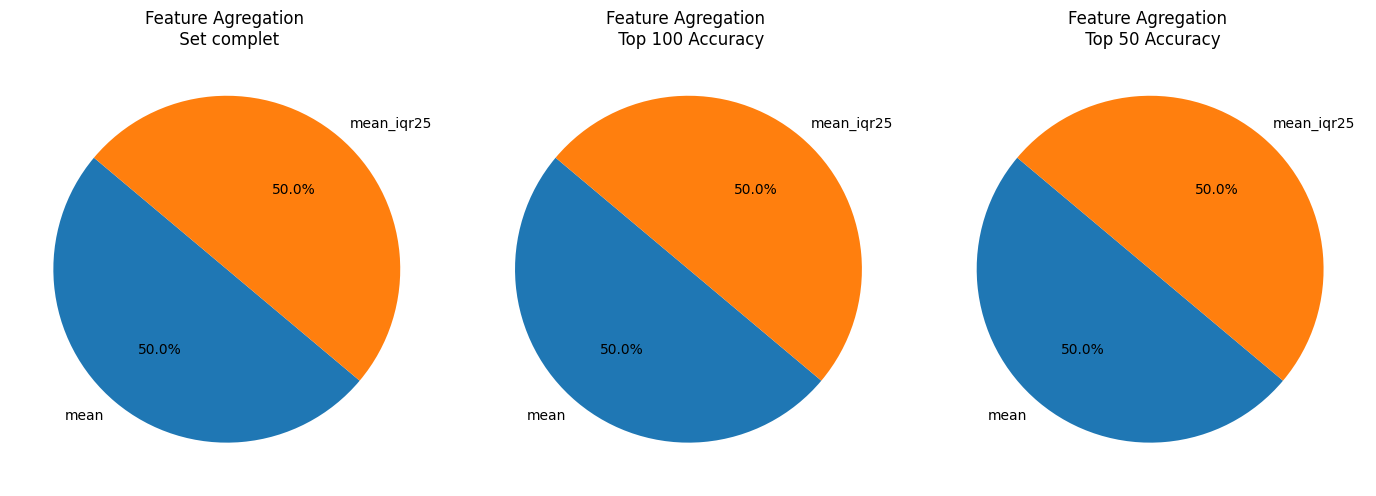

Top 100:   mean: 16%
Top 50:   mean: 16%


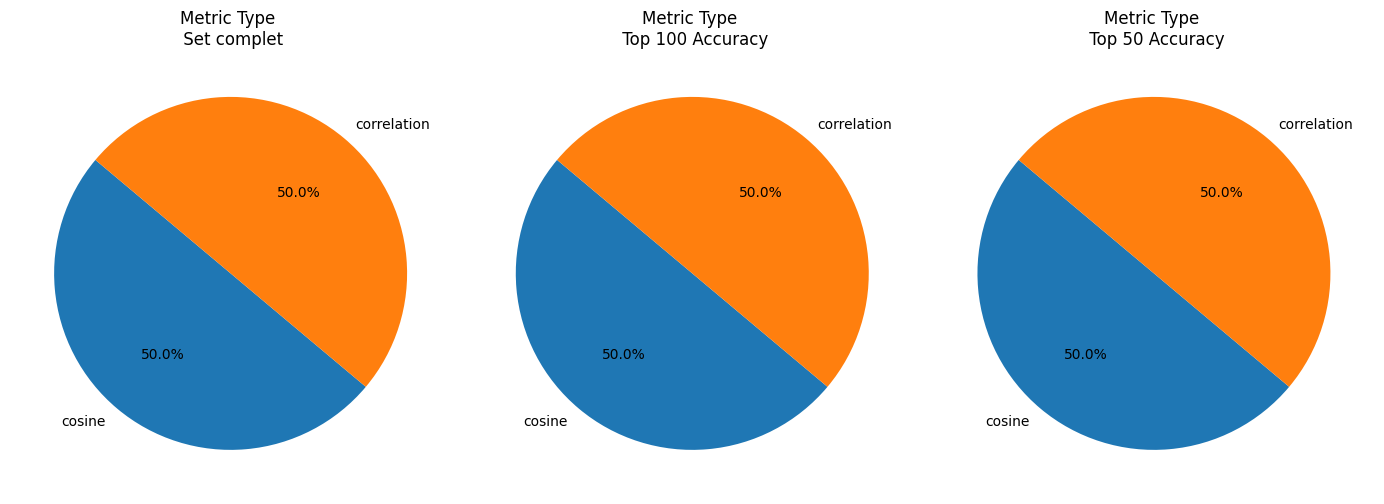

Top 100:   cosine: 16%
Top 50:   cosine: 16%


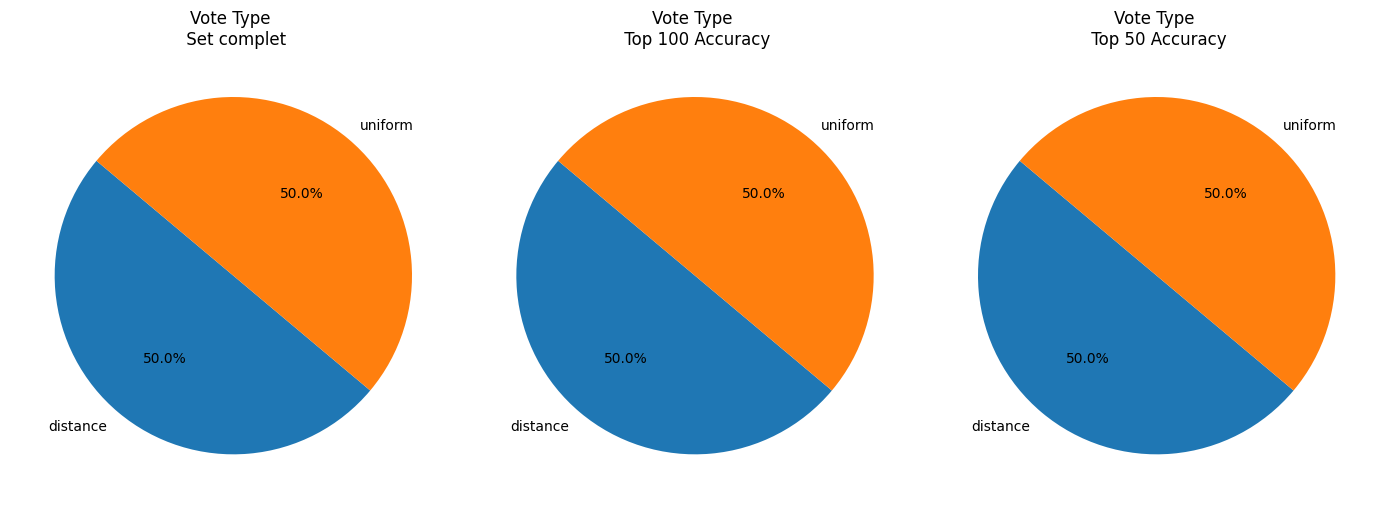

Top 100:   distance: 16%
Top 50:   distance: 16%


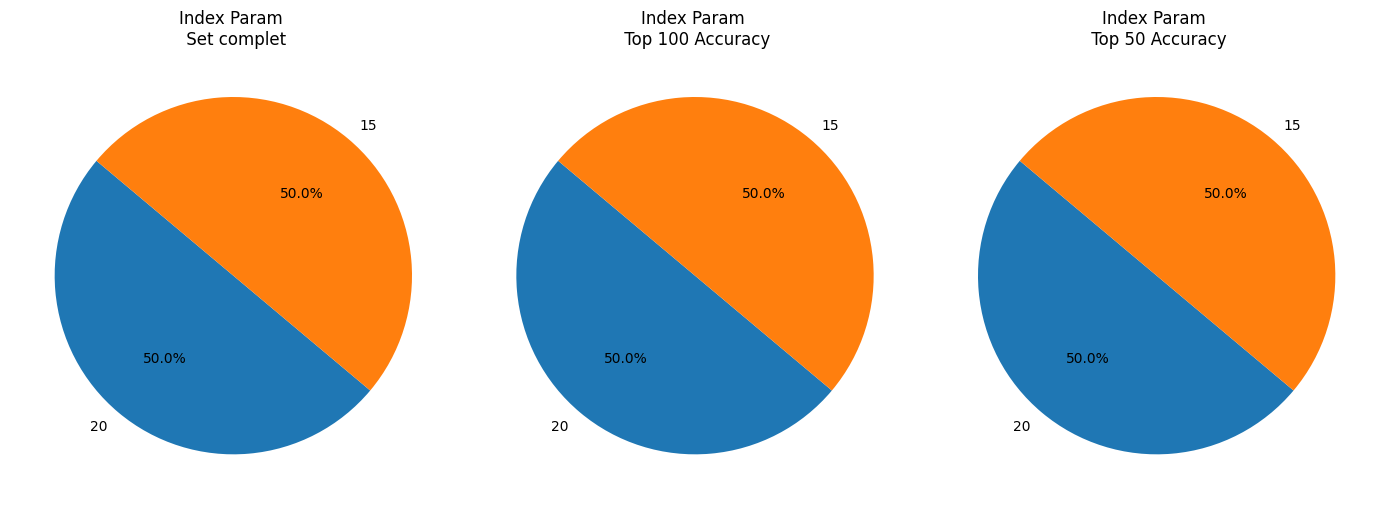

Top 100:   20: 16%
Top 50:   20: 16%
 ########## Reports ##############


FileNotFoundError: [Errno 2] No such file or directory: 'faiss_results/072ace97bfbb6188a59f4618469a6dc4.faiss'

In [43]:
results_file_path='experiments' + os.sep + '20250620_executed_knn_configs_results_v3_all.csv'
df_sorted = lib.load_resuls_file(results_file_path)
top1_n = 50
top2_n = 100
df_top1, df_top2 = lib.print_results_stat(df_sorted, top1_n, top2_n)


df_cosine = df_sorted[df_sorted['metric_type'] == 'cosine']
df_correlation = df_sorted[df_sorted['metric_type'] == 'correlation']
print('Cosine avg train time (s):', df_cosine['train_time'].mean(), "Train memory:", df_cosine['train_used_memory'].mean(),  "Predict time (S)", df_cosine['predict_time'].mean(), "Predict memory (MB):", df_cosine['predict_used_memory'].mean())
print('correlation avg train time (s):', df_correlation['train_time'].mean(), "Train memory:", df_correlation['train_used_memory'].mean(), "Predict time (S)", df_correlation['predict_time'].mean(), "Predict memory (MB):", df_correlation['predict_used_memory'].mean())


lucky_winner = {}
# lucky_winner['segment_lenght'] = lib.display_one_param_pie("segment_lenght", df_sorted, df_top100, df_top200, 200, 100, "Segment lenght")
# #lucky_winner['segment_overlap'] = lib.display_one_param_pie("segment_overlap", df_sorted, df_top100, df_top200, 200, 100, "Segment Overlap")
# lib.display_2params_pie("segment_lenght", "segment_overlap", df_sorted, df_top100, df_top200, 200, 100, "Segment lenght and Overlap")
# lucky_winner['feature'] = lib.display_one_param_pie("feature", df_sorted, df_top100, df_top200, 200, 100, "Applied feature")
lucky_winner['vector_operation'] = lib.display_one_param_pie("vector_operation", df_sorted, df_top1, df_top2, top1_n, top2_n, "Feature Agregation")
#lib.display_2params_pie("feature", "vector_operation", df_sorted, df_top100, df_top200, 200, 100, "Feature and agregation")
lucky_winner['metric_type'] = lib.display_one_param_pie("metric_type", df_sorted, df_top1, df_top2, top1_n, top2_n, "Metric Type")
lucky_winner['vote_type'] = lib.display_one_param_pie("vote_type", df_sorted, df_top1, df_top2, top1_n, top2_n, "Vote Type")
lucky_winner['neighbors'] = lib.display_one_param_pie("neighbors", df_sorted, df_top1, df_top2, top1_n, top2_n, "Index Param")

faiss_tool.report_results(results_file_path, 20)

#results_file_path='experiments' + os.sep + 'knn_comparations.csv'
